Text(0.5, 1.0, 'Computer Logs')

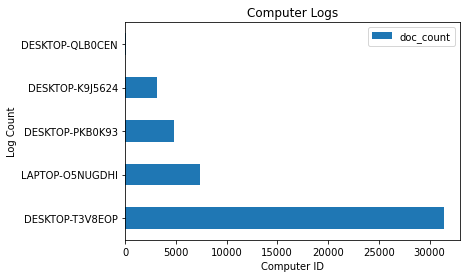

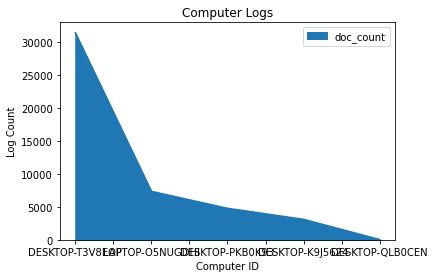

In [9]:
from datetime import datetime
from elasticsearch import Elasticsearch
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time

es_ip = "http://127.0.0.1:9200/"
es = Elasticsearch(es_ip)

query_str = {"size": 0,"aggregations": {"result": {"terms": {"field": "winlog.computer_name.keyword","order": [{"_count": "desc"}]}}}}
res = es.search(index="winlogbeat", body=query_str)
result = res["aggregations"]["result"]["buckets"]

computer_pd = pd.DataFrame(result, columns=["key", "doc_count"])
computer_pd.plot(x="key", y="doc_count", kind="barh");
plt.xlabel('Computer ID')
plt.ylabel('Log Count')
plt.title('Computer Logs')

computer_pd = pd.DataFrame(result, columns=["key", "doc_count"])
computer_pd.plot(x="key", y="doc_count", kind="area");
plt.xlabel('Computer ID')
plt.ylabel('Log Count')
plt.title('Computer Logs')